In [1]:
from lbm.datasets.housing_prices import Preprocessor
import pandas as pd

processor = Preprocessor()
train_loader, val_loader, test_loader = processor.get_loaders()

feature_names = processor.get_feature_names()

df = pd.DataFrame(columns=feature_names)
for X, y in train_loader:
    # iterate over each row of X
    for x in X:
        # append the row to the dataframe
        df.loc[len(df)] = x.numpy()
display(df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-118.309998,33.880001,35.0,1939.0,412.0,1036.0,400.0,3.5556
1,-121.959999,37.270000,31.0,3347.0,589.0,1566.0,597.0,5.5151
2,-122.910004,39.029999,14.0,2374.0,557.0,723.0,427.0,1.3532
3,-122.970001,38.500000,44.0,3234.0,746.0,1112.0,470.0,1.9265
4,-117.699997,33.500000,4.0,7474.0,1037.0,2969.0,1007.0,8.7591
...,...,...,...,...,...,...,...,...
16341,-121.830002,37.369999,43.0,1461.0,284.0,800.0,258.0,3.2279
16342,-122.000000,37.980000,31.0,2030.0,337.0,867.0,341.0,5.0915
16343,-121.980003,36.990002,14.0,6787.0,1454.0,3416.0,1357.0,3.5943
16344,-117.940002,34.040001,33.0,1493.0,331.0,1571.0,354.0,3.8864


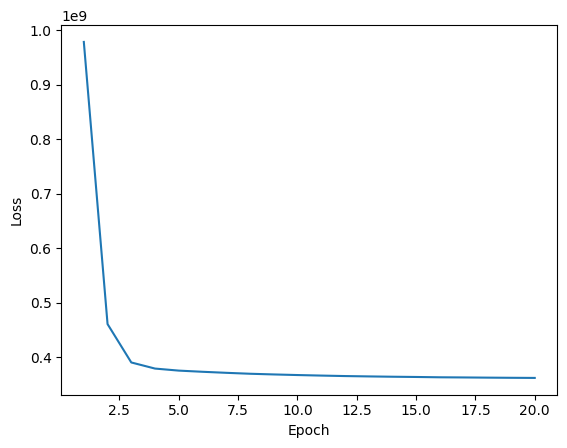

In [5]:
from lbm.models import MultiInLinear
from lbm.workflow import test, train
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import numpy as np

means, stds = processor.get_z_score()
model = MultiInLinear(len(feature_names), means, stds)

optimizer = optim.SGD(model.parameters())
loss_fn = nn.MSELoss()
losses = train(model, train_loader, optimizer, loss_fn, epochs=20)
plt.plot(np.arange(1, len(losses) + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [6]:
without_ocean_proximity_test_loss = test(model, val_loader, loss_fn)
print(f'Without ocean proximity test loss: {without_ocean_proximity_test_loss}')

Without ocean proximity test loss: 356798441.94615763


In [8]:
processor = Preprocessor(include_ocean_proximity=True)
train_loader, val_loader, test_loader = processor.get_loaders()

feature_names = processor.get_feature_names()

df = pd.DataFrame(columns=feature_names)
for X, y in train_loader:
    # iterate over each row of X
    for x in X:
        # append the row to the dataframe
        df.loc[len(df)] = x.numpy()
display(df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-118.209999,33.880001,32.0,1507.0,379.0,1082.0,350.0,3.2250,1.0,0.0,0.0,0.0,0.0
1,-117.680000,34.150002,24.0,1033.0,189.0,486.0,204.0,4.1719,0.0,1.0,0.0,0.0,0.0
2,-117.169998,32.689999,19.0,2802.0,802.0,1159.0,597.0,4.7891,0.0,0.0,0.0,0.0,1.0
3,-118.050003,34.139999,39.0,2125.0,295.0,862.0,303.0,8.9728,0.0,1.0,0.0,0.0,0.0
4,-122.470001,37.770000,52.0,3143.0,635.0,1350.0,623.0,3.8571,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,-124.169998,40.779999,39.0,1606.0,330.0,731.0,327.0,1.6369,0.0,0.0,0.0,0.0,1.0
16342,-121.279999,38.750000,52.0,493.0,89.0,189.0,94.0,2.1080,0.0,1.0,0.0,0.0,0.0
16343,-117.970001,33.889999,14.0,923.0,136.0,420.0,130.0,10.2252,1.0,0.0,0.0,0.0,0.0
16344,-118.029999,34.080002,37.0,775.0,179.0,726.0,183.0,3.2500,0.0,1.0,0.0,0.0,0.0


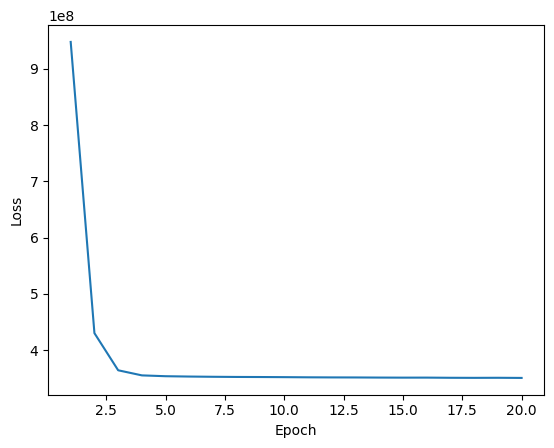

In [10]:
means, stds = processor.get_z_score()
model = MultiInLinear(len(feature_names), means, stds)

optimizer = optim.SGD(model.parameters())
loss_fn = nn.MSELoss()
losses = train(model, train_loader, optimizer, loss_fn, epochs=20)
plt.plot(np.arange(1, len(losses) + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [11]:
with_ocean_proximity_test_loss = test(model, val_loader, loss_fn)
print(f'Without ocean proximity test loss: {without_ocean_proximity_test_loss}')
print(f'With ocean proximity test loss: {with_ocean_proximity_test_loss}')

Without ocean proximity test loss: 356798441.94615763
With ocean proximity test loss: 358040796.28781205
